Understanding and Comparing Text Corpus : Exploratory Data Analysis of text genre

In [3]:
import nltk
nltk.download("treebank")
nltk.download("cmudict")
nltk.download("brown")
nltk.download("movie_reviews")

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/shounakmondal/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/shounakmondal/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/shounakmondal/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/shounakmondal/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [8]:
#imports and loads

from nltk.corpus import treebank,cmudict,brown,movie_reviews
from collections import defaultdict, Counter
import matplotlib
import matplotlib.pyplot as plt

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import altair as alt

stopwords_set = stopwords.words("English")
stopwords_set.extend(["would", "could", "one", "may"])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shounakmondal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Functions

def corpus_info(corpus, genre):
    '''get information about a genre of a corpus. Returns average sentence length, percentage of a Adjective POS, Lexical Density'''
    if genre not in corpus.categories():
        print("Genre not found in Corpus")
        return
    
    counter = Counter(word.lower() for word in corpus.words(categories=genre))
    print("Wordcloud:")
    wordcloud = WordCloud(stopwords = stopwords_set).generate(" ".join(corpus.words(categories=genre)))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    return [get_average_sent_len(corpus, genre), percent_pos(corpus, genre, "JJ"), get_lexical_density(corpus, genre)]
          
def get_average_sent_len(corpus, genre):
    '''get average sentence length of a genre of a corpus'''
    total = 0
    for sentence in corpus.sents(categories=genre):
        total = total + len(sentence)
        
    return round(total / len(corpus.sents(categories=genre)))

def percent_pos(corpus, genre, pos_requested):
    '''get percentage of a specified POS in a genre of a corpus'''
    lst = []
    for word, pos in corpus.tagged_words(categories = genre):
        if pos[0:2] == pos_requested:
            lst.append(word)

    return round(len(lst)/len(corpus.tagged_words(categories = genre)) * 100,2)

def get_lexical_density(corpus, genre):
    '''get lexical density of a genre of a corpus'''
    open_class_prefix = {"N", "V", "J", "R"}
    open_class_total = 0
    for word, pos in corpus.tagged_words(categories = genre):
        if pos[0] in open_class_prefix:
            open_class_total += 1
    return round(open_class_total/len(corpus.words(categories = genre)) * 100,2)

def divide_probs(prob1, prob2):
    '''given two probability dictionaries, create a dictionary has the ratios of probabilities (prob1/prob2)
    for each word included in both'''
    all_words = set(prob1.keys()).intersection(prob2.keys())
    return {word:prob1.get(word,0)/prob2.get(word,0) for word in all_words}

def get_unigram_probs(words):
    '''get unigram probabilities for the words in a corpus'''
    counts = Counter(word.lower() for word in words)
    total = sum(counts.values())
    return {word:count/total for word,count in counts.items()}

def average_prob(prob1, prob2):
    '''get average probabilities for the words in two corpuses'''
    all_words = set(prob1.keys()).intersection(prob2.keys())
    return {word:(prob1.get(word,0)+prob2.get(word,0))/2 for word in all_words}


In [10]:
# Change these to try out any corpus and any genre in that corpus, But limited to 3 genre only
corpus = brown
genre1 = "adventure"
genre2 = "religion"
genre3 = "editorial"

Wordcloud:


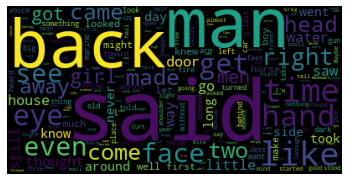

In [11]:
lst = corpus_info(corpus, genre1)
lst.append(genre1)
df = pd.DataFrame([list(pd.Series(lst))],  columns =  ["average_sent_len", "percent_pos", "lexical_density","genre"])
df = df[["genre", "average_sent_len", "percent_pos", "lexical_density"]]

Wordcloud:


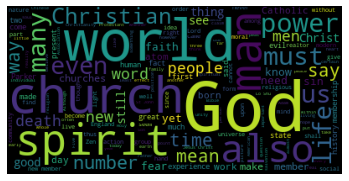

In [12]:
lst = corpus_info(corpus,genre2)
lst.append(genre2)
new_row = {'genre':genre2, 'average_sent_len':lst[0], 'percent_pos':lst[1], 'lexical_density':lst[2]}
df = df.append(new_row, ignore_index= True)

Wordcloud:


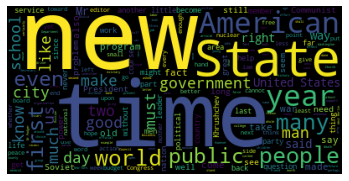

,genre,average_sent_len,percent_pos,lexical_density
0,adventure,15,4.16,41.06
1,religion,23,6.65,41.15
2,editorial,21,6.87,44.35


In [13]:
lst = corpus_info(corpus,genre3)
lst.append(genre3)
new_row = {'genre':genre3, 'average_sent_len':lst[0], 'percent_pos':lst[1], 'lexical_density':lst[2]}
df = df.append(new_row, ignore_index= True)
df

In [14]:
cols_list = ['average_sent_len','percent_pos','lexical_density']

alt.Chart(df, height = 100).mark_bar().encode(
    y = alt.Y(alt.repeat(), type='quantitative'),
    x = 'genre',
    color = alt.Color('genre', legend=None),
).properties(
    width=200,
    height=200
).repeat(
    cols_list,
    columns = 3
)

alt.RepeatChart(...)

In [15]:
adverture_probs = get_unigram_probs(brown.words(categories = genre1))
religion_probs = get_unigram_probs(brown.words(categories = genre2))
editorial_probs = get_unigram_probs(brown.words(categories = genre3))

avg_probs = average_prob(religion_probs, editorial_probs)
div_dict = divide_probs(adverture_probs,avg_probs)
div_sorted_words1 = sorted(div_dict.keys(),key=lambda x: div_dict[x])
print("50 words strongly associated with genre :",genre1, "\n\n",div_sorted_words1[-50:])

print("\n")
avg_probs = average_prob(adverture_probs, editorial_probs)
div_dict = divide_probs(religion_probs,avg_probs)
div_sorted_words2 = sorted(div_dict.keys(),key=lambda x: div_dict[x])
print("50 words strongly associated with genre :",genre2, "\n\n",div_sorted_words2[-50:])

print("\n")
avg_probs = average_prob(adverture_probs, religion_probs)
div_dict = divide_probs(editorial_probs,avg_probs)
div_sorted_words3 = sorted(div_dict.keys(),key=lambda x: div_dict[x])
print("50 words strongly associated with genre :",genre3, "\n\n",div_sorted_words3[-50:])


50 words strongly associated with genre : adventure 

 ['ground', 'wide', 'heard', 'surprise', 'burned', "you'd", "you're", 'grass', 'quickly', 'steps', 'head', 'woman', 'corner', 'door', 'water', 'blood', 'voice', 'looked', 'lifted', "wouldn't", 'walked', 'dark', 'fingers', 'she', 'walk', 'minutes', 'shot', 'hit', 'gray', 'oh', 'turned', "that's", 'started', 'yards', 'throat', 'horse', "didn't", 'waiting', 'drink', 'eyes', 'wife', 'front', 'got', 'watched', 'girl', 'sat', 'her', 'caught', 'maybe', "i'm"]


50 words strongly associated with genre : religion 

 ['number', 'claim', 'kingdom', 'created', 'personality', 'mere', 'code', 'mercy', 'certainty', 'relatives', 'intended', 'modern', 'beings', 'image', 'fill', 'existence', 'reality', 'terms', 'nature', 'devoted', 'consciousness', 'creation', 'moral', 'human', 'everywhere', 'soul', 'ourselves', 'experience', 'numbers', 'structure', 'ideas', 'aspects', 'positive', 'england', 'persons', 'opportunities', 'belong', 'religion', 'thou', '

<b>Conclusions :</b> 

1.Sentence Length for <b>adventure genre</b> is shorter indicating that works of fiction have shorter sentence for <b>easier reading</b> as compared to religious texts<br>
2.% POS Adjective for <b>adventure genre</b> is much lesser indicating that works of fiction have <b>less descriptions of nouns</b> as compared to editorial and religious texts. This is expected as adventure genre has less nouns than religion or editorial<br>
3. There is no major difference in Lexical density but as expected <b>editorial</b> has most lexical density indicating that its <b>most informative</b> as compared to adventure or religious text<br>
